In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import pickle
import os
os.getcwd()

'/home/GNlearning/lorenz'

'1-2-3'

In [2]:
df = pd.read_csv('artifacts/DA_logs.csv')

In [3]:
# pd.to_numeric(df[' nouter'])
serie = df[' nouter']

In [4]:
df.columns = df.columns.str.replace(' ', '') 

In [5]:
df

,#exp,ncycle,nouter,f(x),CGiter,logdet,cond,condprec
0,baseline,0,0,6584.5072577740375,42,233.43857835505548,21.634683209980086,21.634683209980086
1,baseline,0,1,5109.035815777046,39,233.52906213547425,18.94417567960426,18.94417567960426
2,baseline,0,2,5003.6243929958455,36,233.6501232746793,17.243231639386856,17.243231639386856
3,#exp,ncycle,nouter,f(x),CGiter,logdet,cond,condprec
4,baseline,1,0,7112.492189905748,44,233.9820371919973,28.807539199775558,28.807539199775558
...,...,...,...,...,...,...,...,...
554,Spectral_50,18,2,4901.55449157906,18,234.22265781157364,32.682484317713396,9.302187424045098
555,#exp,ncycle,nouter,f(x),CGiter,logdet,cond,condprec
556,Spectral_50,19,0,6425.896985458889,19,233.26380294816417,28.492643330050274,8.934438477191843
557,Spectral_50,19,1,4530.974836578953,18,234.8219073550488,28.660199754596956,9.204115558944473


In [6]:
df.nouter = pd.to_numeric(df.nouter, errors='coerce')
df.CGiter = pd.to_numeric(df.CGiter, errors='coerce')

In [7]:
df[df.nouter == 0]

,#exp,ncycle,nouter,f(x),CGiter,logdet,cond,condprec
0,baseline,0,0.0,6584.5072577740375,42.0,233.43857835505548,21.634683209980086,21.634683209980086
4,baseline,1,0.0,7112.492189905748,44.0,233.9820371919973,28.807539199775558,28.807539199775558
8,baseline,2,0.0,6428.22575224828,43.0,234.01654350171268,25.592524836726927,25.592524836726927
12,baseline,3,0.0,6761.647348699244,44.0,234.32458117449,29.140456943206388,29.140456943206388
16,baseline,4,0.0,6264.098829270141,45.0,233.41103501982494,30.04393123027242,30.04393123027242
...,...,...,...,...,...,...,...,...
540,Spectral_50,15,0.0,7457.6133043059235,19.0,233.54130996991705,35.07247332353163,9.1132821339008
544,Spectral_50,16,0.0,8219.159999731126,20.0,233.09695053382677,32.84620662607656,9.290911757264542
548,Spectral_50,17,0.0,7103.5530325049185,19.0,233.1787836036131,33.08012515247733,8.944665018402356
552,Spectral_50,18,0.0,6947.481030543484,20.0,232.80178231212875,24.810650859432872,8.964925340466758


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

<Axes: xlabel='nouter', ylabel='CGiter'>

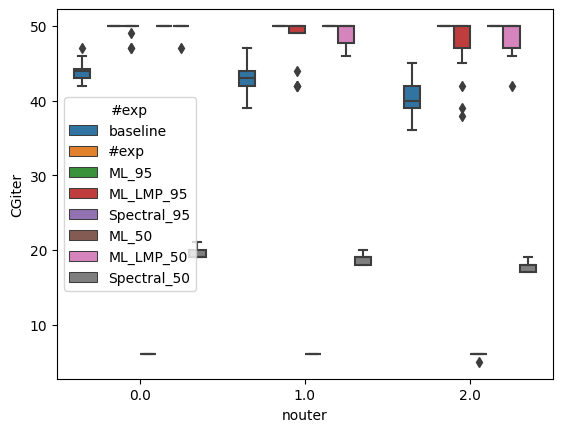

In [8]:
sns.boxplot(df, x='nouter', y="CGiter", hue="#exp" , orient="v")

In [9]:
df = pd.read_csv('artifacts/residuals.csv')

In [10]:
df.name

0       baseline
1          ML_95
2      ML_LMP_95
3    Spectral_95
4          ML_50
5      ML_LMP_50
6    Spectral_50
Name: name, dtype: object

In [11]:
list_of_df = []
for na in ['baseline', 'ML_95', 'ML_50', 'Spectral_50']:
    print(na)
    str_array = df[df['name'] == na]['residuals'].item()
    li = []
    # print(str_array.split(','))
    # print(str_array.split(' ')[:-1])
    for stri in str_array.split(',')[:-1]:
        # print(stri)
        li.append(np.fromstring(stri, dtype=float, sep=' '))
        # print(li)
    try:
        res_array = np.asarray(li).reshape(15, 3, 11)
    except ValueError:
        pass
    for i in range(3):
        _df = pd.DataFrame({'residuals': res_array[:, i, -1]})
        _df['nouter'] = i
        _df['name'] = na
        list_of_df.append(_df)
df_residuals_at_10 = pd.concat(list_of_df)

baseline


NameError: name 'res_array' is not defined

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

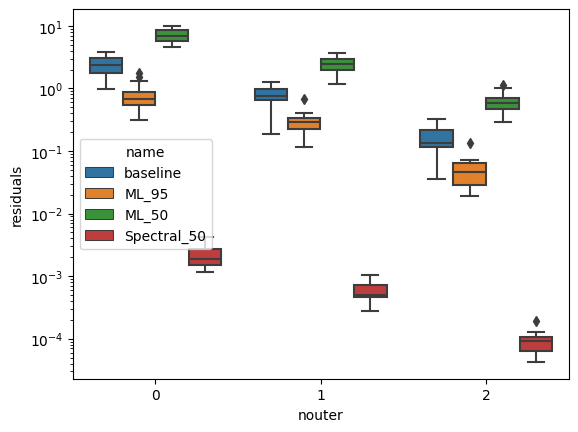

In [ ]:
sns.boxplot(df_residuals_at_10, y='residuals', x='nouter', hue='name')
plt.yscale('log')

In [ ]:
res_array = res_array.reshape(15, 3, 11) # n_cycle= 15, n_outer = 3, n_inner=10 

array([0.69799239, 1.01348342, 0.59738525, 0.4852701 , 0.66625554,
       0.51833865, 0.67028026, 1.73610804, 1.29477603, 1.51497696,
       0.75036055, 0.66579625, 0.4868392 , 0.56862003, 0.30879045])

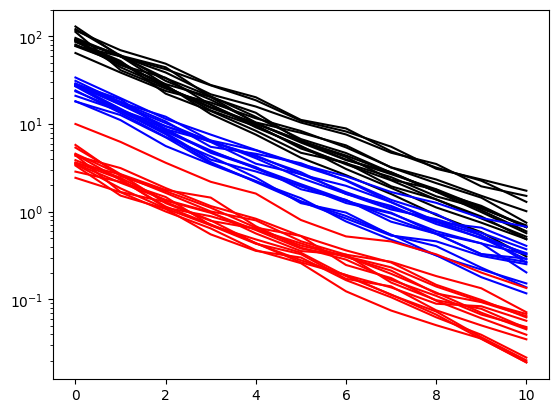

In [ ]:
plt.plot(res_array[:, 0, :].T, color='k')
plt.yscale('log')
plt.plot(res_array[:,1, :].T, color='b')
plt.yscale('log')
plt.plot(res_array[:,2, :].T, color='r')
plt.yscale('log')


In [ ]:
list_of_dicts = [{'residuals': res_array[:, i, -1], 'nouter': i} for i in [0, 1, 2]]

In [ ]:
pd.DataFrame(list_of_dicts)

,residuals,nouter
0,"[0.6979923917125819, 1.013483418090948, 0.5973...",0
1,"[0.25185991555352316, 0.1171099953746419, 0.20...",1
2,"[0.056965820529721455, 0.019065794923160826, 0...",2


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


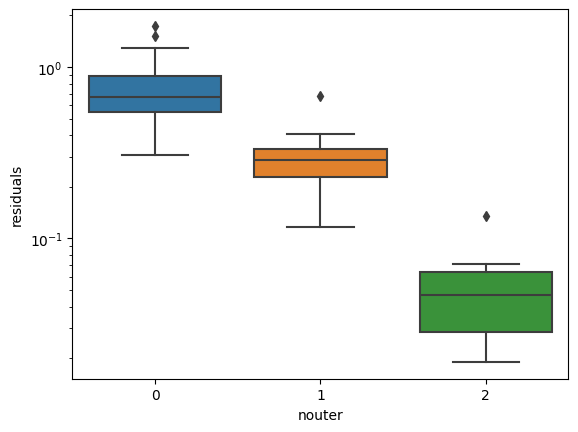

In [ ]:
sns.boxplot(dff, y='residuals', x='nouter')
plt.yscale('log')

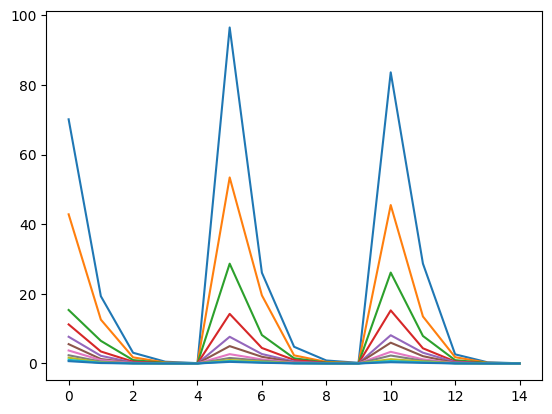

In [ ]:
import matplotlib.pyplot as plt
plt

In [ ]:
import re

string = "1 2 3 (test 0, test 0) (test (0 test) 0)"


result, start_parens_count, end_parens_count, term = [], 0, 0, ""
for x in re.split(r"([()])", str_array):
    if not x.strip():
        continue
    elif x == "(":
        if start_parens_count > 0:
            term += "("
        start_parens_count += 1
    elif x == ")":
        end_parens_count += 1
        if end_parens_count == start_parens_count:
            result.append(term)
            end_parens_count, start_parens_count, term = 0, 0, ""
        else:
            term += ")"
    elif start_parens_count > end_parens_count:
        term += x
    else:
        result.extend(x.strip(" ").split(" "))


result

['[[8.09741121e+01',
 '4.33750833e+01',
 '2.40559371e+01',
 '1.47455917e+01',
 '',
 '1.03475884e+01',
 '5.27176875e+00',
 '2.97037826e+00',
 '1.80380398e+00',
 '',
 '1.00312369e+00',
 '5.48384415e-01',
 '3.39321808e-01]',
 '[2.18217153e+01',
 '1.38214766e+01',
 '8.04895863e+00',
 '4.74506242e+00',
 '',
 '2.68599944e+00',
 '1.71193361e+00',
 '9.98987455e-01',
 '5.90047347e-01',
 '',
 '2.98233856e-01',
 '1.66858345e-01',
 '1.03946111e-01]',
 '[2.42943957e+00',
 '1.67522947e+00',
 '9.47462646e-01',
 '5.91135600e-01',
 '',
 '4.29843595e-01',
 '2.31376031e-01',
 '1.52946410e-01',
 '8.83178896e-02',
 '',
 '5.09535776e-02',
 '3.71627455e-02',
 '1.74861804e-02]',
 '[3.74628392e-01',
 '2.54394994e-01',
 '1.51179914e-01',
 '8.61356596e-02',
 '',
 '5.13048779e-02',
 '3.31552626e-02',
 '2.23354667e-02',
 '1.31104394e-02',
 '',
 '7.15659863e-03',
 '4.44120013e-03',
 '2.45916817e-03]',
 '[6.72167758e-02',
 '4.26450613e-02',
 '2.55665342e-02',
 '1.61995435e-02',
 '',
 '9.47874904e-03',
 '6.11871576e-

In [ ]:
aa = np.array(df[df['name'] == "ML_95"]['residuals'][1])

()

In [2]:
with open(
    "/home/data/data_data_assimilation/artifacts/CG_results_2days.pkl", "rb"
) as fhandle:
    CG_results = pickle.load(fhandle)

In [4]:
CG_results.keys()

dict_keys([23345, 70951, 93230, 116226, 139034, 161581, 198993, 235859, 271965, 298717])

In [26]:
pd.DataFrame()

""


In [30]:
list_dict = []

for key, val in CG_results.items():
    for method, subdict in CG_results[key].items():
        rate =subdict['rate']
        niter = np.asarray(subdict['diag']['xk']).shape[0] * 5
        print(rate, niter, method)
        list_dict.append({'rate': rate, 'niter': niter, 'method': method})

-0.017133389572124975 1375 baseline
-0.0016205373669222636 2000 spectral_500
-0.01299431174350708 1860 spectral_500_auto
-0.0015930369787875564 2000 spectral_1000
-0.011112088937447275 2000 spectral_1000_auto
-0.01298254147023711 1865 spectral_500_mean
-0.011106371832299785 2000 spectral_1000_mean
-0.019568643085500315 1165 ML_1000_sauto_beta
-0.02277238095009611 910 ML_1000_sauto
-0.017071896068480964 1385 baseline
-0.0016640607977107674 2000 spectral_500
-0.012978087655856447 1870 spectral_500_auto
-0.001664255102507254 2000 spectral_1000
-0.011048347385634429 2000 spectral_1000_auto
-0.012974838231416232 1870 spectral_500_mean
-0.011044878282035393 2000 spectral_1000_mean
-0.02014414224799819 1175 ML_1000_sauto_beta
-0.023660192525670466 1045 ML_1000_sauto
-0.01714171417193774 1380 baseline
-0.0016641319810155842 2000 spectral_500
-0.013039112203995708 1865 spectral_500_auto
-0.0016782038138928143 2000 spectral_1000
-0.011101592601925215 2000 spectral_1000_auto
-0.013035690675189055

-0.0016212454195793304 2000 spectral_1000
-0.011153369351335159 2000 spectral_1000_auto
-0.013080934784246798 1875 spectral_500_mean
-0.011152212723393772 2000 spectral_1000_mean
-0.01770524375639682 1265 ML_1000_sauto_beta
-0.021228133944856037 995 ML_1000_sauto
-0.017255789430320415 1380 baseline
-0.0016725108623355303 2000 spectral_500
-0.013128421945462309 1735 spectral_500_auto
-0.0016682593980774994 2000 spectral_1000
-0.011174051726742592 2000 spectral_1000_auto
-0.013122518481177329 1735 spectral_500_mean
-0.011196425265482073 2000 spectral_1000_mean
-0.019568826780696384 1170 ML_1000_sauto_beta
-0.02309532990599748 1040 ML_1000_sauto
-0.017165382203700934 1375 baseline
-0.0016801270062685003 2000 spectral_500
-0.013030530890579567 1870 spectral_500_auto
-0.0016691657284469473 2000 spectral_1000
-0.011110833423800252 2000 spectral_1000_auto
-0.013021715776521428 1870 spectral_500_mean
-0.011101359741585834 2000 spectral_1000_mean
-0.021249267924283975 1120 ML_1000_sauto_beta
-0

In [40]:
dataframe = pd.DataFrame(list_dict)
import matplotlib.pyplot as plt

/tmp/ipykernel_2002476/758398326.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['baseline', 'ML'])
/tmp/ipykernel_2002476/758398326.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['baseline', 'ML'])


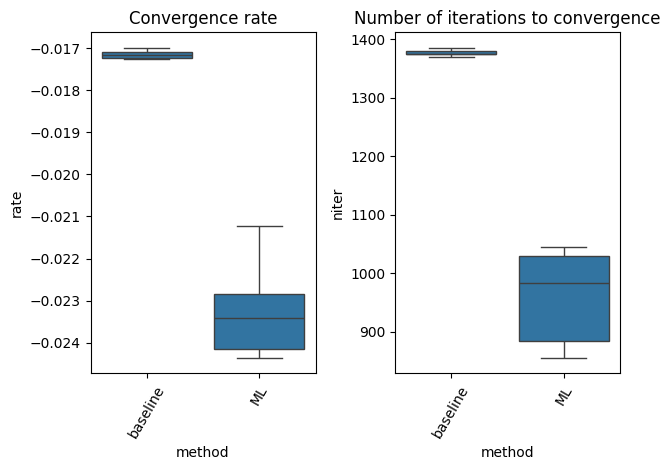

In [55]:
# reduced_dataframe = dataframe.query('method == ["baseline","ML_1000_sauto","ML_1000_sauto_beta"]')
reduced_dataframe = dataframe.query('method == ["baseline","ML_1000_sauto"]')

# reduced_dataframe = dataframe.rename("baseline","ML_1000_sauto","ML_1000_sauto_beta"]')

plt.subplot(1, 2, 1)
ax = sns.boxplot(reduced_dataframe, x='method', y='rate')
ax.tick_params(axis='x', labelrotation=60)
ax.set_xticklabels(['baseline', 'ML'])
plt.title('Convergence rate')
plt.subplot(1, 2, 2)
ax = sns.boxplot(reduced_dataframe, x='method', y='niter')
ax.tick_params(axis='x', labelrotation=60)
ax.set_xticklabels(['baseline', 'ML'])

plt.title('Number of iterations to convergence')
plt.tight_layout()

In [ ]:
for key, val in CG_results.items():
    for method, subdict in CG_results[key].items():
        rate =subdict['rate']
        niter = np.asarray(subdict['diag']['xk']).shape[0] * 5
        print(rate, niter, method)
        list_dict.append({'rate': rate, 'niter': niter, 'method': method})

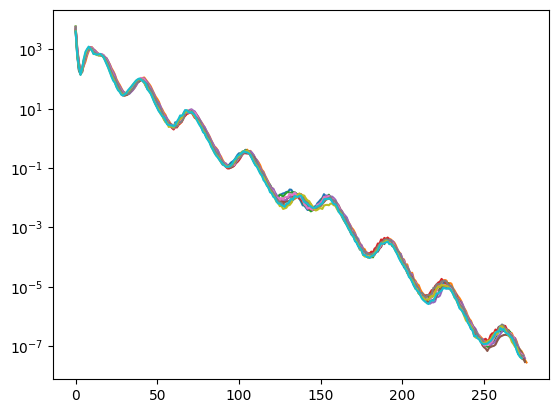

In [69]:
for key, val in CG_results.items():
    plt.plot(np.linalg.norm(np.asarray(val['baseline']['diag']['residuals']), axis=1), color='k', alpha=0.5)
    plt.plot(np.linalg.norm(np.asarray(val['baseline']['diag']['residuals']), axis=1), color='blue', alpha=0.5)
    plt.yscale('log')